## **Programt 3**

## Quantum Entanglement

Multi-partite entangled states are also possible. A very popular example of such a state is the  GHZ state, named after the authors who first proposed it's interesting properties. This belongs to a class of multi-qubit states called _cat states_, after Schrodinger's cat. You will create this state in the first problem.

## **Problem**

Prepare the GHZ state $|\text{GHZ}\rangle = \frac{1}{\sqrt{2}}(|000\rangle + |111\rangle)$ in a quantum circuit **using only the basic single-qubit gates and CNOT**. Below we have provided you with some code to create a quantum circuit. Remember that a qubit in a quantum circuit always begins in the $|0\rangle$ state. Add appropriate gates.

In [1]:
# Importing python and Qiskit libraries

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries and configuring account
import qiskit
from qiskit import QuantumCircuit, execute
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator
from qiskit.visualization import *
from qiskit.quantum_info import *

# Adding standard gates

basis_gates = ['id', 'x', 'y', 'z', 's', 't', 'sdg', 'tdg', 'h', 'p', 'sx' ,'r', 'rx', 'ry', 'rz', 'u', 'u1', 'u2', 'u3', 'cx', 'barrier', 'measure', 'snapshot']

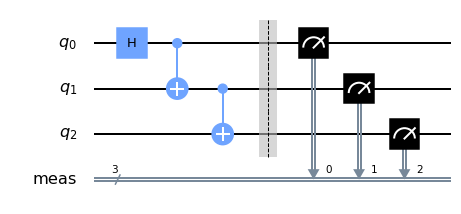

In [2]:
# Implementing the Quantum Circuit for the problem

qc1 = QuantumCircuit(3) 
# Insert gates below to create the state 
qc1.h(0)
qc1.cx(0,1)
qc1.cx(1,2)
# Do not change below this line. You do not need to add an additional measurement. 
qc1.measure_all()
qc1.draw('mpl')

Success


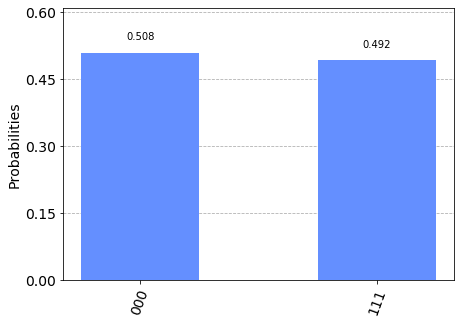

In [4]:
# Visualization

try:
    assert list(qc1.count_ops()) != [], "Circuit cannot be empty"
    assert set(qc1.count_ops().keys()).difference(basis_gates) == set(), f"Only the following basic gates are allowed: {basis_gates}"
    assert all([type(gate[0]) == qiskit.circuit.measure.Measure for gate in qc1.data[-3:len(qc1.data)]]), "Measurement must be the last operation in a circuit."
    sv_check = Statevector.from_instruction(qc1.remove_final_measurements(inplace=False)).equiv((Statevector.from_label('000')+Statevector.from_label('111'))/np.sqrt(2))
    assert sv_check, "You did not prepare the correct state."
    job = execute(qc1, backend=QasmSimulator(), shots=1024, seed_simulator=0)
    counts = job.result().get_counts()
    print("Success" if (sv_check) else "failed")  
except AssertionError as e:
    print(f'Your code has an error:  {e.args[0]}')
    
except Exception as e:
    print(f'This error occured: {e.args[0]}')
plot_histogram(counts)